In [57]:
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns

## Indentification of TAD-SV-eQTL

In [3]:
# the eQTL data can be downloaded from https://drive.google.com/file/d/1S0nARNKakaQ6vAdRr0dsMIv3_dZzD54E/view?usp=sharing
# be sure to download the file under the same directory as your analysis

eqtl = pd.read_csv('../data/qtl_results_all_v4_fdr0.05.txt', sep='\t', dtype=str)

In [4]:
eqtl.shape

(850482, 29)

In [7]:
all_DEL_boundary_3_sig = pd.read_csv('../data/all_DEL_boundary_3_sig_10kbflank.bed', sep='\t', header = 0)
all_INS_boundary_3_sig = pd.read_csv('../data/all_INS_boundary_3_sig_10kbflank.bed', sep='\t', header = 0)
all_DEL_boundary_3_sig_loc = all_DEL_boundary_3_sig[['CHROM', 'START_POS', 'END_POS', 'INFO_ID']]
all_INS_boundary_3_sig_loc = all_INS_boundary_3_sig[['CHROM', 'START_POS', 'END_POS', 'INFO_ID']]

In [9]:
pangenie_svs_sample_DEL_eqtl = eqtl[(eqtl['snp_id'].isin(all_DEL_boundary_3_sig['INFO_ID']))]
pangenie_svs_sample_DEL_eqtl.shape

(16, 29)

In [10]:
len(pangenie_svs_sample_DEL_eqtl['snp_id'].drop_duplicates())

11

In [15]:
eqtl_DEL_boundary_gene = list(pangenie_svs_sample_DEL_eqtl['feature_id'])
len(eqtl_DEL_boundary_gene)

16

In [12]:
pangenie_svs_sample_INS_eqtl = eqtl[(eqtl['snp_id'].isin(all_INS_boundary_3_sig['INFO_ID']))]
pangenie_svs_sample_INS_eqtl.shape

(14, 29)

In [13]:
len(pangenie_svs_sample_INS_eqtl['snp_id'].drop_duplicates())

9

In [16]:
eqtl_INS_boundary_gene = list(pangenie_svs_sample_INS_eqtl['feature_id'])
len(eqtl_INS_boundary_gene)

14

In [17]:
# the gene expression data can be downloaded from https://drive.google.com/file/d/1SwaWkat00Fac4ACpbA6T3wzKppGO8srI/view?usp=sharing
# be sure to download the file under the same directory as your analysis

gene_expression = pd.read_csv('../data/featureCounts_v2.genes.counts.edgeR.log.txt', sep='\t', header=0)
gene_expression_DEL_boundary = gene_expression.filter(items = eqtl_DEL_boundary_gene, axis=0)
gene_expression_INS_boundary = gene_expression.filter(items = eqtl_INS_boundary_gene, axis=0)

In [18]:
sample = ['NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732']
gene_expression_DEL_boundary_sample = gene_expression_DEL_boundary.filter(regex='|'.join(sample), axis=1)
gene_expression_INS_boundary_sample = gene_expression_INS_boundary.filter(regex='|'.join(sample), axis=1)
## only keep the first 7 characters of the columns name
gene_DEL_boundary_sample_rename = gene_expression_DEL_boundary_sample.rename(columns = lambda x : str(x)[:7])
gene_INS_boundary_sample_rename = gene_expression_INS_boundary_sample.rename(columns = lambda x : str(x)[:7])
gene_DEL_boundary_sample_rename_new =  gene_DEL_boundary_sample_rename.reset_index().rename(columns={'index': 'gene'})
gene_INS_boundary_sample_rename_new =  gene_INS_boundary_sample_rename.reset_index().rename(columns={'index': 'gene'})

In [26]:
DEL_INFO_ID = list(pangenie_svs_sample_DEL_eqtl.iloc[:, 1])
len(DEL_INFO_ID)

16

In [29]:
gene_DEL_boundary_sample_rename_new['INFO_ID'] = DEL_INFO_ID 
gene_DEL_boundary_sample_rename_new = gene_DEL_boundary_sample_rename_new[[
'gene','INFO_ID', 'NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [30]:
INS_INFO_ID = list(pangenie_svs_sample_INS_eqtl.iloc[:, 1])
len(INS_INFO_ID)

14

In [31]:
gene_INS_boundary_sample_rename_new['INFO_ID'] = INS_INFO_ID 
gene_INS_boundary_sample_rename_new = gene_INS_boundary_sample_rename_new[[
'gene','INFO_ID', 'NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [24]:
DEL_genotype = pd.read_csv('../preprocess_data/pangenie_svs_26sample_ALL_DEL_atleast5_50_genotype_only01.bed', sep='\t', header=0, dtype=str)
INS_genotype = pd.read_csv('../preprocess_data/pangenie_svs_26sample_ALL_INS_atleast5_50_genotype_only01.bed', sep='\t', header=0, dtype=str)

In [32]:
DEL_genotype_1 = DEL_genotype.iloc[:, :-1]
INS_genotype_1 = INS_genotype.iloc[:, :-1]
DEL_boundary_genotype = DEL_genotype_1[DEL_genotype_1['INFO_ID'].isin(DEL_INFO_ID)]
INS_boundary_genotype = INS_genotype_1[INS_genotype_1['INFO_ID'].isin(INS_INFO_ID)]
DEL_boundary_genotype = DEL_boundary_genotype[[
'CHROM', 'START_POS', 'END_POS', 'TYPE', 'LEN', 'FILTER', 'INFO_ID','FORMAT','NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]
INS_boundary_genotype = INS_boundary_genotype[[
'CHROM', 'START_POS', 'END_POS', 'TYPE', 'LEN', 'FILTER', 'INFO_ID','FORMAT','NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [33]:
DEL_boundary_genotype_1 = DEL_boundary_genotype.reset_index(drop=True)
DEL_boundary_genotype_1.shape

(11, 34)

In [34]:
INS_boundary_genotype_1 = INS_boundary_genotype.reset_index(drop=True)
INS_boundary_genotype_1.shape

(9, 34)

#### Mann-Whitney U test for genotypes and gene expression

In [39]:
### test for genotypes 0 and 1
pvalue= []

for i in range(0, len(gene_DEL_boundary_sample_rename_new)):
    DEL_boundary_genotype_all = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == gene_DEL_boundary_sample_rename_new.loc[i,'INFO_ID']].iloc[:,8:35]
    genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
    gene_expression_list = gene_DEL_boundary_sample_rename_new.iloc[i, 2:28].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_expression' : gene_expression_list})
    
    # Convert the 'genotypes' column to string type
    df['genotypes'] = df['genotypes'].astype(str)
    
    df_new = df.assign(expression=df.groupby('genotypes').cumcount()).pivot('expression','genotypes','gene_expression')
    
    try:
        U, p = mannwhitneyu(x=df_new['0'].dropna().tolist(), y=df_new['1'].dropna().tolist(), method="exact", alternative = 'two-sided')
        #print (p)
        
    except KeyError:
        p = 'NA'
        #print (p)
    
    pvalue.append(p)
    
gene_DEL_boundary_sample_rename_new['pvalue_0_1'] = pvalue

In [42]:
def fdr_correction(group):
    _, corrected_pvalues, _, _ = multipletests(group['pvalue_0_1'], method='fdr_bh')
    group['qvalue'] = corrected_pvalues
    return group

In [114]:
corrected_del_eqtl = gene_DEL_boundary_sample_rename_new.groupby('INFO_ID').apply(fdr_correction)
corrected_del_eqtl.to_csv('../data/all_del_eqtl_boundary_qvalue.bed', index = False, sep='\t', header=True)

In [115]:
sig_del_eqtl = corrected_del_eqtl[corrected_del_eqtl['qvalue'] < 0.05]
sig_del_eqtl.to_csv('../data/sig_del_eqtl.bed', index = False, sep='\t', header=True)
sig_del_eqtl

,gene,INFO_ID,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,...,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732,pvalue_0_1,qvalue
1,ZNF502,chr3-44510750-DEL-50,0.505437,0.711072,1.169339,0.680864,0.703322,0.658127,0.429553,0.838574,...,0.584878,0.825207,0.906216,1.278297,0.618792,0.891358,1.553150,0.709216,0.001468,0.004404
2,LOC105377056,chr3-44510750-DEL-50,0.051585,0.259984,0.248820,0.200549,0.133223,0.102748,0.153295,0.211812,...,0.112703,0.189359,0.349621,0.228916,0.091698,0.161873,0.339314,0.184628,0.003371,0.005056
7,XKR9,chr8-70671321-DEL-1088,0.230725,0.078901,0.301779,0.267848,0.270861,0.136379,0.530737,0.218365,...,0.214502,0.225182,0.273766,0.139141,0.287291,0.175466,0.463090,0.130936,0.000040,0.000121
8,ERICH1,chr8-644401-DEL-5014,1.748027,2.397384,1.672566,2.079122,1.959391,1.973457,2.233838,2.596048,...,1.929456,1.850300,1.798068,2.061475,1.680383,1.861537,2.319171,2.234540,0.000122,0.000122


In [48]:
### test for genotypes 0 and 1
pvalue= []

for i in range(0, len(gene_INS_boundary_sample_rename_new)):
    INS_boundary_genotype_all = INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == gene_INS_boundary_sample_rename_new.loc[i,'INFO_ID']].iloc[:,8:35]
    genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
    gene_expression_list = gene_INS_boundary_sample_rename_new.iloc[i, 2:28].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_expression' : gene_expression_list})
    
    # Convert the 'genotypes' column to string type
    df['genotypes'] = df['genotypes'].astype(str)    
    
    df_new = df.assign(expression=df.groupby('genotypes').cumcount()).pivot('expression','genotypes','gene_expression')
    
    try:
        U, p = mannwhitneyu(x=df_new['0'].dropna().tolist(), y=df_new['1'].dropna().tolist(), method="exact", alternative = 'two-sided')
        #print (p)
        
    except KeyError:
        p = 'NA'
        #print (p)
    
    pvalue.append(p)
    
gene_INS_boundary_sample_rename_new['pvalue_0_1'] = pvalue

In [118]:
corrected_ins_eqtl = gene_INS_boundary_sample_rename_new.groupby('INFO_ID').apply(fdr_correction)
corrected_ins_eqtl.to_csv('../data/all_ins_eqtl_boundary_qvalue.bed', index = False, sep='\t', header=True)

In [119]:
sig_ins_eqtl = corrected_ins_eqtl[corrected_ins_eqtl['qvalue'] < 0.05]
sig_ins_eqtl.to_csv('../data/sig_ins_eqtl.bed', index = False, sep='\t', header=True)
sig_ins_eqtl

,gene,INFO_ID,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,...,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732,pvalue_0_1,qvalue
0,CCDC163,chr1-45497763-INS-354,2.451951,2.138003,2.807306,1.613811,2.671173,2.302246,2.088805,2.481762,...,2.677383,2.596948,2.678364,2.705544,1.964997,2.047240,2.476094,2.718013,0.012772,0.038315
9,SCAPER,chr15-76198866-INS-67,2.732734,2.450514,2.412903,2.561219,2.473855,2.413278,2.501987,2.962800,...,2.603157,1.970033,2.210502,2.369374,2.151918,1.861709,2.555223,2.630280,0.031556,0.031556


### visualization of chr8-644401-DEL-5014 and chr1-45497763-INS-354

In [63]:
gene_expression_list = gene_DEL_boundary_sample_rename_new.iloc[8, 2:28].values.tolist()
DEL_boundary_genotype_all = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == gene_DEL_boundary_sample_rename_new.loc[8,'INFO_ID']].iloc[:,8:35]
genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_expression' : gene_expression_list})
df_new = df.assign(expression=df.groupby('genotypes').cumcount()).pivot('expression','genotypes','gene_expression')

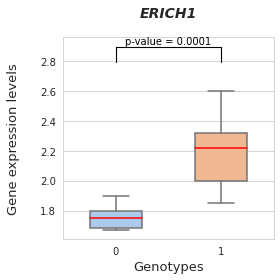

In [64]:
# Set Seaborn's default style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create the boxplot using Seaborn
plt.figure(figsize=(4, 4))  # Adjust the figure size
ax = sns.boxplot(data=df_new[['0', '1']], palette="pastel", medianprops=dict(color='red'), width=0.5)

# Set labels, titles, and other properties
ax.set_ylabel('Gene expression levels', fontsize=13, labelpad=20)
ax.set_xlabel('Genotypes', fontsize=13)
ax.set_title('ERICH1', pad=20, fontsize=14, fontweight='bold', style='italic')

# Display the plot
plt.tight_layout()

# statistical annotation
x1, x2 = 0, 1 
y, h, col = df_new['1'].max() + 0.2, 0.1, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.1, c=col)
plt.text((x1+x2)*.5, y+h, "p-value = 0.0001", ha='center', va='bottom', color=col)

plt.show()

In [65]:
gene_expression_list = gene_INS_boundary_sample_rename_new.iloc[0, 2:28].values.tolist()
INS_boundary_genotype_all = INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == gene_INS_boundary_sample_rename_new.loc[0,'INFO_ID']].iloc[:,8:35]
genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_expression' : gene_expression_list})
df_new = df.assign(expression=df.groupby('genotypes').cumcount()).pivot('expression','genotypes','gene_expression')

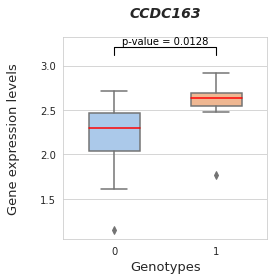

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn's default style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create the boxplot using Seaborn
plt.figure(figsize=(4, 4))  # Adjust the figure size
ax = sns.boxplot(data=df_new[['0', '1']], palette="pastel", medianprops=dict(color='red'), width=0.5)

# Set labels, titles, and other properties
ax.set_ylabel('Gene expression levels', fontsize=13, labelpad=20)
ax.set_xlabel('Genotypes', fontsize=13)
ax.set_title('CCDC163', pad=20, fontsize=14, fontweight='bold', style='italic')

# Display the plot
plt.tight_layout()

# statistical annotation
x1, x2 = 0, 1 
y, h, col = df_new['1'].max() + 0.2, 0.1, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.1, c=col)
plt.text((x1+x2)*.5, y+h, "p-value = 0.0128", ha='center', va='bottom', color=col)

plt.show()

## Indentification of TAD-SV-sQTL 

In [67]:
# the sQTL data can be downloaded from https://drive.google.com/file/d/1L6KhNn-RkC2GA0XrJmmqNbk2urNCH9JZ/view?usp=sharing
# be sure to download the file under the same directory as your analysis

sqtl = pd.read_csv('../data/qtl_results_all_v2_fdr0.05.txt', sep = '\t')

In [68]:
sqtl.shape

(1103872, 22)

In [70]:
pangenie_svs_sample_DEL_sqtl = sqtl[(sqtl['snp_id'].isin(all_DEL_boundary_3_sig['INFO_ID']))]
pangenie_svs_sample_DEL_sqtl.shape

(15, 22)

In [71]:
len(pangenie_svs_sample_DEL_sqtl['snp_id'].drop_duplicates())

6

In [72]:
pangenie_svs_sample_INS_sqtl = sqtl[(sqtl['snp_id'].isin(all_INS_boundary_3_sig['INFO_ID']))]
pangenie_svs_sample_INS_sqtl.shape

(14, 22)

In [73]:
len(pangenie_svs_sample_INS_sqtl['snp_id'].drop_duplicates())

4

In [75]:
# the splice ratio file can be downloaded from https://drive.google.com/file/d/1mPYmfBgWWwyLkjZX5ZI_MMlz0fZSjdaU/view?usp=sharing
# be sure to download the file under the same directory as your analysis

splicing_ratio = pd.read_csv('../data/LCL_perind.counts.qqnorm.CovariatesRemoved.cs.txt', sep='\t', header = 0, index_col=0)

In [76]:
splicing_ratio.shape

(143713, 444)

In [77]:
sqtl_DEL_boundary_feature = list(pangenie_svs_sample_DEL_sqtl['feature_id'])
sqtl_INS_boundary_feature = list(pangenie_svs_sample_INS_sqtl['feature_id'])
splicing_DEL_boundary = splicing_ratio.filter(items = sqtl_DEL_boundary_feature, axis=0)
splicing_INS_boundary = splicing_ratio.filter(items = sqtl_INS_boundary_feature, axis=0)

In [78]:
sample = ['NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732']
splicing_DEL_boundary_sample = splicing_DEL_boundary.filter(regex='|'.join(sample), axis=1)
splicing_INS_boundary_sample = splicing_INS_boundary.filter(regex='|'.join(sample), axis=1)
## only keep the first 7 characters of the columns name
splicing_DEL_boundary_sample_rename = splicing_DEL_boundary_sample.rename(columns = lambda x : str(x)[:7])
splicing_INS_boundary_sample_rename = splicing_INS_boundary_sample.rename(columns = lambda x : str(x)[:7])

In [79]:
splicing_DEL_boundary_sample_rename_new = splicing_DEL_boundary_sample_rename.reset_index().rename(columns={'index': 'feature_id'})
splicing_INS_boundary_sample_rename_new = splicing_INS_boundary_sample_rename.reset_index().rename(columns={'index': 'feature_id'})

In [80]:
splicing_DEL_boundary_sample_rename_new.shape

(15, 27)

In [81]:
splicing_INS_boundary_sample_rename_new.shape

(14, 27)

In [82]:
DEL_INFO_ID = list(pangenie_svs_sample_DEL_sqtl.iloc[:, 1])
len(DEL_INFO_ID)

15

In [83]:
splicing_DEL_boundary_sample_rename_new['INFO_ID'] = DEL_INFO_ID 
splicing_DEL_boundary_sample_rename_new = splicing_DEL_boundary_sample_rename_new[[
'feature_id','INFO_ID', 'NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [84]:
INS_INFO_ID = list(pangenie_svs_sample_INS_sqtl.iloc[:, 1])
len(INS_INFO_ID)

14

In [85]:
splicing_INS_boundary_sample_rename_new['INFO_ID'] = INS_INFO_ID 
splicing_INS_boundary_sample_rename_new = splicing_INS_boundary_sample_rename_new[[
'feature_id','INFO_ID', 'NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [89]:
DEL_genotype_1 = DEL_genotype.iloc[:, :-1]
INS_genotype_1 = INS_genotype.iloc[:, :-1]
DEL_boundary_genotype = DEL_genotype_1[DEL_genotype_1['INFO_ID'].isin(DEL_INFO_ID)]
INS_boundary_genotype = INS_genotype_1[INS_genotype_1['INFO_ID'].isin(INS_INFO_ID)]
DEL_boundary_genotype = DEL_boundary_genotype[[
'CHROM', 'START_POS', 'END_POS', 'TYPE', 'LEN', 'FILTER', 'INFO_ID','FORMAT','NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]
INS_boundary_genotype = INS_boundary_genotype[[
'CHROM', 'START_POS', 'END_POS', 'TYPE', 'LEN', 'FILTER', 'INFO_ID','FORMAT','NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

#### Mann-Whitney U test for genotypes and gene splicing

In [90]:
### test for genotypes 0 and 1
pvalue= []
for i in range(0, len(splicing_DEL_boundary_sample_rename_new)):
    DEL_boundary_genotype_all = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == splicing_DEL_boundary_sample_rename_new.loc[i,'INFO_ID']].iloc[:,8:35]
    genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
    splicing_ratio_list = splicing_DEL_boundary_sample_rename_new.iloc[i, 2:28].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'splicing_ratio' : splicing_ratio_list})
    
    # Convert the 'genotypes' column to string type
    df['genotypes'] = df['genotypes'].astype(str)
    
    df_new = df.assign(splicing=df.groupby('genotypes').cumcount()).pivot('splicing','genotypes','splicing_ratio')
    
    try:
        U, p = mannwhitneyu(x=df_new['0'].dropna().tolist(), y=df_new['1'].dropna().tolist(), method="exact", alternative = 'two-sided')
        #print (p)
        
    except KeyError:
        p = 'NA'
        #print (p)
    
    pvalue.append(p)
    
splicing_DEL_boundary_sample_rename_new['pvalue_0_1'] = pvalue

In [121]:
corrected_del_sqtl = splicing_DEL_boundary_sample_rename_new.groupby('INFO_ID').apply(fdr_correction)
corrected_del_sqtl.to_csv('../data/all_del_sqtl_boundary_qvalue.bed', index = False, sep='\t', header=True)

In [122]:
sig_del_sqtl = corrected_del_sqtl[corrected_del_sqtl['qvalue'] < 0.05]
sig_del_sqtl.to_csv('../data/sig_del_sqtl.bed', index = False, sep='\t', header=True)
sig_del_sqtl

,feature_id,INFO_ID,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,...,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732,pvalue_0_1,qvalue
1,6:87391835:87392725:clu_24429_+,chr6-87408456-DEL-133,-0.936184,0.012348,1.076310,2.158304,-0.932265,0.412867,-0.841126,-0.767154,...,0.036234,-1.040756,-1.141381,0.385166,-0.996222,-1.159694,0.681233,-0.554325,0.014847,0.014847
4,8:70669538:70674818:clu_22301_+,chr8-70671321-DEL-1088,-0.005980,-0.950419,-0.399550,-0.929802,2.013419,-1.227758,2.069432,-1.077835,...,-1.215290,-0.646946,1.773509,-1.187269,0.009941,1.334757,0.612355,-0.937157,0.000244,0.000366
5,8:664676:668598:clu_8652_-,chr8-644401-DEL-5014,1.245457,-0.414052,1.217779,-0.759694,1.209294,1.131286,-0.186955,0.427311,...,0.345217,1.370163,1.423127,0.506337,1.393303,0.331152,0.336981,0.661554,0.012405,0.037215
6,8:70652752:70653695:clu_22301_+,chr8-70671321-DEL-1088,0.704935,1.305387,0.883035,0.859624,-1.808690,0.580523,-2.483752,0.948607,...,0.328117,0.560184,-1.196977,0.807123,-0.060676,-0.594006,0.057426,0.818711,0.000140,0.000366
10,20:35632923:35664760:clu_21372_-,chr20-35960724-DEL-60,1.746169,0.529841,0.298889,-0.216541,-0.391229,0.191113,0.014453,-0.368097,...,-0.306092,-0.028003,-0.167166,-0.169622,-0.432385,-0.916697,-0.475933,-0.963485,0.020419,0.025524
11,20:35655344:35658930:clu_21372_-,chr20-35960724-DEL-60,-2.666742,-0.113100,-0.047915,0.324691,0.682168,0.111165,0.232633,0.199351,...,0.522568,0.629328,0.722698,0.518111,0.397488,0.963883,0.527364,1.150455,0.031556,0.031556
12,20:35632923:35658930:clu_21372_-,chr20-35960724-DEL-60,0.152098,0.418184,0.353582,0.031710,-0.009831,1.008811,0.817291,-0.411666,...,0.128767,0.239788,-0.015342,0.578768,-0.050955,-2.056413,-0.244741,-1.089664,0.007701,0.019251
13,20:35626381:35626735:clu_21369_-,chr20-35960724-DEL-60,-0.432567,0.036543,-0.758824,0.380615,0.448366,-0.411455,0.123351,0.158921,...,-0.012096,0.846607,0.066323,0.321752,0.041438,0.769644,0.496257,0.992429,0.007701,0.019251
14,20:35626381:35626567:clu_21369_-,chr20-35960724-DEL-60,0.548644,0.026216,0.522271,-0.070876,-0.411626,0.380335,-0.271860,-0.091484,...,0.484570,-0.176643,0.101298,-0.041055,-0.358616,-0.959188,0.294405,-1.346577,0.012772,0.021286


In [123]:
len(sig_del_sqtl['INFO_ID'].drop_duplicates())

4

In [94]:
### test for genotypes 0 and 1
pvalue= []
for i in range(0, len(splicing_INS_boundary_sample_rename_new)):
    INS_boundary_genotype_all = INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == splicing_INS_boundary_sample_rename_new.loc[i,'INFO_ID']].iloc[:,8:35]
    genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
    splicing_ratio_list = splicing_INS_boundary_sample_rename_new.iloc[i, 2:28].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'splicing_ratio' : splicing_ratio_list})
    
    # Convert the 'genotypes' column to string type
    df['genotypes'] = df['genotypes'].astype(str)
    
    df_new = df.assign(splicing=df.groupby('genotypes').cumcount()).pivot('splicing','genotypes','splicing_ratio')
    
    try:
        U, p = mannwhitneyu(x=df_new['0'].dropna().tolist(), y=df_new['1'].dropna().tolist(), method="exact", alternative = 'two-sided')
        #print (p)
        
    except KeyError:
        p = 'NA'
        #print (p)
    
    pvalue.append(p)
    
splicing_INS_boundary_sample_rename_new['pvalue_0_1'] = pvalue

In [125]:
corrected_ins_sqtl = splicing_INS_boundary_sample_rename_new.groupby('INFO_ID').apply(fdr_correction)
corrected_ins_sqtl.to_csv('../data/all_ins_sqtl_boundary_qvalue.bed', index = False, sep='\t', header=True)

In [126]:
sig_ins_sqtl = corrected_ins_sqtl[corrected_ins_sqtl['qvalue'] < 0.05]
sig_ins_sqtl.to_csv('../data/sig_ins_sqtl.bed', index = False, sep='\t', header=True)
sig_ins_sqtl

,feature_id,INFO_ID,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,...,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732,pvalue_0_1,qvalue
4,1:45551155:45552436:clu_13870_+,chr1-45497763-INS-354,-1.746480,0.475494,-0.078211,-0.445241,-0.698239,-2.578916,0.338158,1.013390,...,-0.391775,0.861487,0.718653,-0.177377,-0.359558,-0.607451,0.442949,-0.515916,0.000822,0.007402
11,19:37507047:37508265:clu_27679_+,chr19-37789443-INS-1092,-0.422717,0.996525,1.166925,1.740052,-1.491070,1.274219,-1.437013,-1.299856,...,0.340187,-1.421464,-1.307926,-1.419196,-0.705460,2.317070,-1.440027,2.429939,0.012233,0.036699


In [127]:
len(sig_ins_sqtl['INFO_ID'].drop_duplicates())

2

### visualization of chr8-644401-DEL-5014 and chr1-45497763-INS-354

In [100]:
gene_splicing_list = splicing_DEL_boundary_sample_rename_new.iloc[5, 2:28].values.tolist()
DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == splicing_DEL_boundary_sample_rename_new.loc[5,'INFO_ID']]
DEL_boundary_genotype_all = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == splicing_DEL_boundary_sample_rename_new.loc[5,'INFO_ID']].iloc[:,8:35]
genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_splicing' : gene_splicing_list})
df_new = df.assign(splicing=df.groupby('genotypes').cumcount()).pivot('splicing','genotypes','gene_splicing')

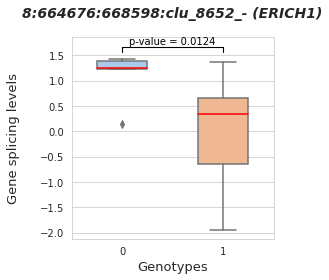

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn's default style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create the boxplot using Seaborn
plt.figure(figsize=(4, 4))  # Adjust the figure size
ax = sns.boxplot(data=df_new[['0', '1']], palette="pastel", medianprops=dict(color='red'), width=0.5)

# Set labels, titles, and other properties
ax.set_ylabel('Gene splicing levels', fontsize=13, labelpad=20)
ax.set_xlabel('Genotypes', fontsize=13)
ax.set_title('8:664676:668598:clu_8652_- (ERICH1)', pad=20, fontsize=14, fontweight='bold', style='italic')

# Display the plot
plt.tight_layout()

# statistical annotation
x1, x2 = 0, 1
y, h, col = df_new['1'].max() + 0.2, 0.1, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.1, c=col)
plt.text((x1+x2)*.5, y+h, "p-value = 0.0124", ha='center', va='bottom', color=col)

plt.show()

In [105]:
gene_splicing_list = splicing_INS_boundary_sample_rename_new.iloc[4, 2:28].values.tolist()
INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == splicing_INS_boundary_sample_rename_new.loc[4,'INFO_ID']]
INS_boundary_genotype_all = INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == splicing_INS_boundary_sample_rename_new.loc[4,'INFO_ID']].iloc[:,8:35]
genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_splicing' : gene_splicing_list})
df_new = df.assign(splicing=df.groupby('genotypes').cumcount()).pivot('splicing','genotypes','gene_splicing')

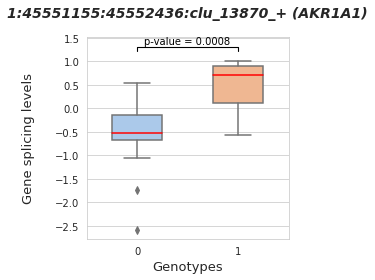

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn's default style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create the boxplot using Seaborn
plt.figure(figsize=(4, 4))  # Adjust the figure size
ax = sns.boxplot(data=df_new[['0', '1']], palette="pastel", medianprops=dict(color='red'), width=0.5)

# Set labels, titles, and other properties
ax.set_ylabel('Gene splicing levels', fontsize=13, labelpad=20)
ax.set_xlabel('Genotypes', fontsize=13)
ax.set_title('1:45551155:45552436:clu_13870_+ (AKR1A1)', pad=20, fontsize=14, fontweight='bold', style='italic')

# Display the plot
plt.tight_layout()

# statistical annotation
x1, x2 = 0, 1
y, h, col = df_new['1'].max() + 0.2, 0.1, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.1, c=col)
plt.text((x1+x2)*.5, y+h, "p-value = 0.0008", ha='center', va='bottom', color=col)

plt.show()

In [153]:
total_overlapped_TAD_SV_QTL = (
    list(pangenie_svs_sample_DEL_eqtl['snp_id'].drop_duplicates()) + 
    list(pangenie_svs_sample_INS_eqtl['snp_id'].drop_duplicates()) + 
    list(pangenie_svs_sample_DEL_sqtl['snp_id'].drop_duplicates()) +
    list(pangenie_svs_sample_INS_sqtl['snp_id'].drop_duplicates())
)

In [154]:
len(total_overlapped_TAD_SV_QTL)

30

In [155]:
# Remove duplicates and get the length of the unique snp_ids
unique_overlapped_TAD_SV_QTL = list(set(total_overlapped_TAD_SV_QTL))
length_unique_overlapped_TAD_SV_QTL = len(unique_overlapped_TAD_SV_QTL)
length_unique_overlapped_TAD_SV_QTL

22

In [156]:
total_TAD_SV_QTL = (
    list(sig_del_eqtl['INFO_ID'].drop_duplicates()) + 
    list(sig_ins_eqtl['INFO_ID'].drop_duplicates()) + 
    list(sig_del_sqtl['INFO_ID'].drop_duplicates()) +
    list(sig_ins_sqtl['INFO_ID'].drop_duplicates())
)

In [157]:
len(total_TAD_SV_QTL)

11

In [158]:
# Remove duplicates and get the length of the unique snp_ids
unique_TAD_SV_QTL = list(set(total_TAD_SV_QTL))
length_unique_TAD_SV_QTL = len(unique_TAD_SV_QTL)
length_unique_TAD_SV_QTL

8

In [159]:
unique_TAD_SV_QTL

['chr1-45497763-INS-354',
 'chr8-644401-DEL-5014',
 'chr15-76198866-INS-67',
 'chr6-87408456-DEL-133',
 'chr20-35960724-DEL-60',
 'chr3-44510750-DEL-50',
 'chr19-37789443-INS-1092',
 'chr8-70671321-DEL-1088']